# Import de fonctions

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from sklearn.datasets import load_diabetes
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np
import sys

# import UCSL github : Unsupervised Clustering driven by Supervised Learning 
!git clone -b sklearn_update https://github.com/rlouiset/py_ucsl > /dev/null 2>&1

sys.path.append('./py_ucsl/')
from ucsl.ucsl_classifier import *
from ucsl.ucsl_regressor import *


# Import data

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


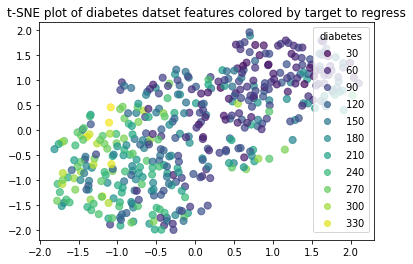

In [6]:
# load diabets dataset
diabetes = load_diabetes()

# get rid of age and sex
X_train = diabetes.data[:,2:]

# normalize training features
scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)
y_train = diabetes.target

# project both on tSNE
tsne = TSNE(n_components=2)
X_train_tsne = tsne.fit_transform(X_train)
X_train_tsne = scaler.fit_transform(X_train_tsne)

# plot t-SNE feature projection
fig, ax = plt.subplots()
scatter = ax.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=y_train, s=50, alpha=0.7)
ax.legend(*scatter.legend_elements(), title="diabetes")
plt.title("t-SNE plot of diabetes datset features colored by target to regress")
plt.show()


# Diabetes clustering

In [7]:
# UCSL training
regression_method = SVR(kernel="linear")
UCSL_method = UCSL_R(n_clusters=2, clustering="k_means", maximization=regression_method)
UCSL_method = UCSL_method.fit(X_train, y_train)

# KMeans training
KMeans_method = KMeans(n_clusters=2)
KMeans_method = KMeans_method.fit(X_train_scale)

# GaussianMixture training
GaussianMixture_method = GaussianMixture(n_components=2)
GaussianMixture_method = GaussianMixture_method.fit(X_train_scale)


UCSL_method :

body mass index of cluster 0 :  0.0273+/-0.047
body mass index of cluster 1 :  -0.027+/-0.047

blood pressure of cluster 0 :  0.0232+/-0.047
blood pressure of cluster 1 :  -0.023+/-0.047


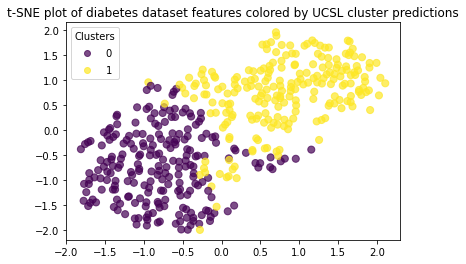

---------------------------------------------------
KMeans method :

body mass index of cluster 0 :  0.0237+/-0.047
body mass index of cluster 1 :  -0.025+/-0.047

blood pressure of cluster 0 :  0.0195+/-0.047
blood pressure of cluster 1 :  -0.020+/-0.047


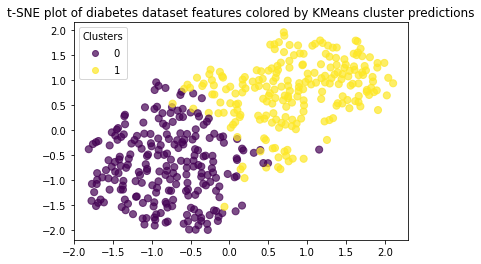

---------------------------------------------------
Gaussian Mixture method :

body mass index of cluster 0 :  0.0228+/-0.044
body mass index of cluster 1 :  -0.016+/-0.042

blood pressure of cluster 0 :  0.0188+/-0.045
blood pressure of cluster 1 :  -0.013+/-0.044


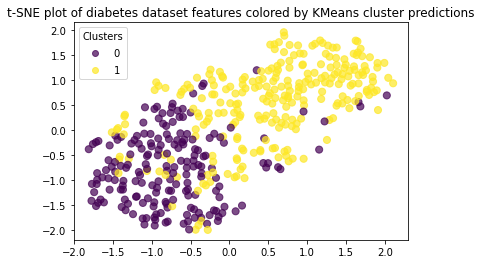

In [8]:
# UCSL predictions
y_pred_regression, y_pred = UCSL_method.predict(X_train_scale)
print('UCSL_method :')
print('')
print('body mass index of cluster 0 : ', str(np.mean(X_train[y_pred==0, 0]))[:6] + '+/-' + str(np.std(X_train[:, 0]))[:5])
print('body mass index of cluster 1 : ', str(np.mean(X_train[y_pred==1, 0]))[:6] + '+/-' + str(np.std(X_train[:, 0]))[:5])
print('')
print('blood pressure of cluster 0 : ', str(np.mean(X_train[y_pred==0, 1]))[:6] + '+/-' + str(np.std(X_train[:, 1]))[:5])
print('blood pressure of cluster 1 : ', str(np.mean(X_train[y_pred==1, 1]))[:6] + '+/-' + str(np.std(X_train[:, 1]))[:5])

fig, ax = plt.subplots()
scatter = ax.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=y_pred, s=50, alpha=0.7)
ax.legend(*scatter.legend_elements(), title="Clusters")
plt.title("t-SNE plot of diabetes dataset features colored by UCSL cluster predictions")
plt.show()

print('---------------------------------------------------')

# KMeans predictions
y_pred = KMeans_method.predict(X_train_scale)
print('KMeans method :')
print('')
print('body mass index of cluster 0 : ', str(np.mean(X_train[y_pred==0, 0]))[:6] + '+/-' + str(np.std(X_train[:, 0]))[:5])
print('body mass index of cluster 1 : ', str(np.mean(X_train[y_pred==1, 0]))[:6] + '+/-' + str(np.std(X_train[:, 0]))[:5])
print('')
print('blood pressure of cluster 0 : ', str(np.mean(X_train[y_pred==0, 1]))[:6] + '+/-' + str(np.std(X_train[:, 1]))[:5])
print('blood pressure of cluster 1 : ', str(np.mean(X_train[y_pred==1, 1]))[:6] + '+/-' + str(np.std(X_train[:, 1]))[:5])

fig, ax = plt.subplots()
scatter = ax.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=y_pred, s=50, alpha=0.7)
ax.legend(*scatter.legend_elements(), title="Clusters")
plt.title("t-SNE plot of diabetes dataset features colored by KMeans cluster predictions")
plt.show()

print('---------------------------------------------------')

# GaussianMixture predictions
y_pred = GaussianMixture_method.predict(X_train_scale)
print('Gaussian Mixture method :')
print('')
print('body mass index of cluster 0 : ', str(np.mean(X_train[y_pred==0, 0]))[:6] + '+/-' + str(np.std(X_train[y_pred==0, 0]))[:5])
print('body mass index of cluster 1 : ', str(np.mean(X_train[y_pred==1, 0]))[:6] + '+/-' + str(np.std(X_train[y_pred==1, 0]))[:5])
print('')
print('blood pressure of cluster 0 : ', str(np.mean(X_train[y_pred==0, 1]))[:6] + '+/-' + str(np.std(X_train[y_pred==0, 1]))[:5])
print('blood pressure of cluster 1 : ', str(np.mean(X_train[y_pred==1, 1]))[:6] + '+/-' + str(np.std(X_train[y_pred==1, 1]))[:5])

fig, ax = plt.subplots()
scatter = ax.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=y_pred, s=50, alpha=0.7)
ax.legend(*scatter.legend_elements(), title="Clusters")
plt.title("t-SNE plot of diabetes dataset features colored by KMeans cluster predictions")
plt.show()